In [1]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="5,6"  # specify which GPU(s) to be used
bm.disable_gpu_memory_preallocation()
bm.set_platform('gpu')

/home/spirit/anaconda3/envs/slca/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
simulation_number = 80
model = bp.neurons.WangBuzsakiModel(simulation_number)
input_current = bm.linspace(0.,16.,simulation_number)
runner = bp.dyn.DSRunner(model, monitors=['spike','V'], inputs=['input',input_current],dt=0.01)
runner.run(1000.)
spike_sum = runner.mon['spike'].sum(axis=0) 

  0%|          | 0/100000 [00:00<?, ?it/s]

Predict 100000 steps: : 100%|██████████| 100000/100000 [00:18<00:00, 5289.96it/s]


In [26]:
print(spike_sum)

[  0   8  25  37  48  58  67  76  84  92  99 106 113 120 126 132 138 144
 150 156 161 166 171 176 181 186 191 195 200 204 209 213 217 221 225 229
 233 237 240 244 248 249 255 258 262 265 268 272 275 278 281 284 287 290
 293 296 299 302 305 307 310 313 316 318 321 323 326 329 331 334 336 339
 341 343 346 348 350 353 355 357]


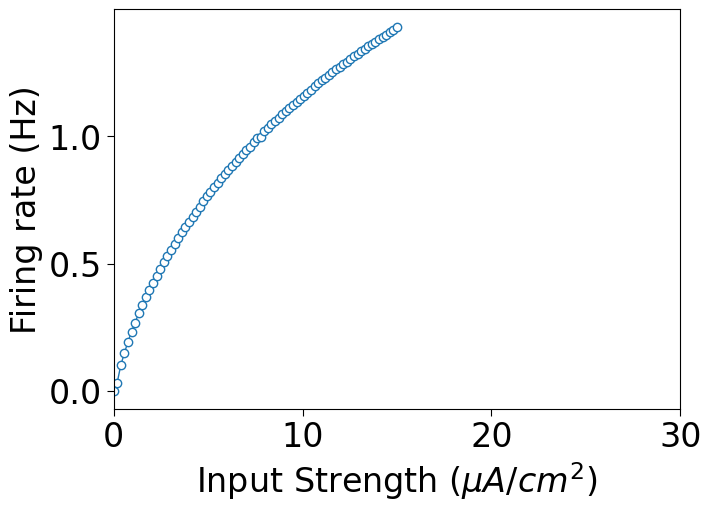

In [27]:
import matplotlib.pyplot as plt
plt_style = {
    'figure.autolayout' : True,
    'font.size' : 24,
    'lines.linewidth' : 2,
    # 'xtick.labelsize' : 'medium',
    # 'ytick.labelsize' : 'medium',
        'xtick.labelsize' : 'medium',
    'ytick.labelsize' : 'medium',
    'legend.fontsize' : 'medium',
    'axes.spines.top' : True,
    'axes.spines.right' : True,
    'xtick.major.size' : 5,
    'ytick.major.size' : 5,
    'legend.fontsize' : 24,
    'axes.labelsize' : 24,
    'axes.titlesize' : 24,
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val

I_ext_list       = np.linspace(0.,15.,simulation_number)
firing_rate_list = spike_sum * 4/1000

#paint
fig, gs = bp.visualize.get_figure(1, 1, 5, 7)
firing_rate_list = bm.array(firing_rate_list)
# firing_rate_list[firing_rate_list < 10] =0
plt.plot(I_ext_list, firing_rate_list, marker = "o", markerfacecolor = 'white',linewidth =1)
plt.xlabel(r'Input Strength ($\mu A/cm^2$)')
plt.ylabel('Firing rate (Hz)')
# plt.xlim(I_ext_list[0]-0.1, I_ext_list[-1]+0.1)
# plt.ylim([-5,100])
plt.xlim(0, 30)
plt.show()

[ 0.78159428 -0.7076062   4.72806135  2.87859296  0.04085677]


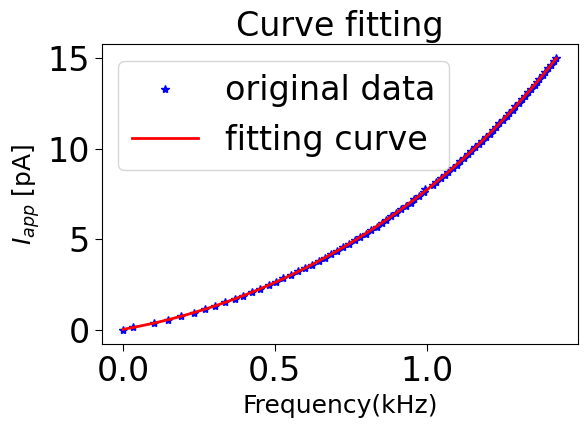

In [36]:
from scipy.optimize import curve_fit 
def model_function(x,a,b,c,d,f):
    return a*x**4 + b* x**3 + c*x**2 +d*x + f

# def model_function(x, a, b, c):
#     return a * np.exp(b * x) + c

y = I_ext_list
x = firing_rate_list

coefficients = np.polyfit(x, y, deg=4)  # 2表示二次多项式
poly = np.poly1d(coefficients)

# 生成拟合曲线上的点
y_fit = poly(x)
print(coefficients)

# 绘制拟合曲线和原始数据
import matplotlib.pyplot as plt
plt.plot(x, y,'b*',label='original data')
plt.plot(x, y_fit,'r',label='fitting curve')
plt.ylabel('$I_{app}$ [pA]', fontsize=18)
plt.xlabel('Frequency(kHz)', fontsize=18)
plt.title('Curve fitting')
plt.legend()
plt.show()


In [37]:
print(poly)

        4          3         2
0.7816 x - 0.7076 x + 4.728 x + 2.879 x + 0.04086
